In [0]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import skimage
%matplotlib inline
from sklearn import svm, metrics, datasets
from sklearn import metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import keras
from keras import layers
from keras.utils import to_categorical


#  Load Data

In [0]:
def load_images_files(container_path, dimension=(120,120)):
    image_dir = Path(container_path)
    files =  [individual_jpg for individual_jpg in image_dir.iterdir() if individual_jpg.is_file()]
    descr = "An image classification dataset"
    images = []
    flat_data = []
    target = []
    categories = ['dalmatian','dollar_bill','pizza','soccer_ball','sunflower']
    for file in files:
        img = skimage.io.imread(file)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        temp =img_resized.flatten()
        flat_data.append(temp)
        img_gray = rgb2gray(img_resized)
        images.append(img_gray)
        temp = file.stem[:-3]
        if temp == 'dalmatian':
            target.append(0)
        elif temp == 'dollar_bill':
            target.append(1)
        elif temp == 'pizza':
            target.append(2)
        elif temp == 'soccer_ball':
            target.append(3)
        else:
            target.append(4)
            
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    images = images.reshape((len(files),120,120,1))

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)          
        

In [0]:
image_dataset = load_images_files('images_scrambled/')

# Split Data to train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.images, image_dataset.target,test_size=0.3)

# Turn classes to categorical

In [0]:
y_train1 = to_categorical(y_train)

# Le-Net 5 Model

In [0]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(120,120,1),kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.MaxPooling2D(strides=(2,2)))
model.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.MaxPooling2D(strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=120,kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(units=84, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dense(units=5,kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.categorical_accuracy])

## CheckPoint Creation

In [0]:
filepath = "checkpoints/weights-improvement-{epoch:03d}-{val_categorical_accuracy:0.2f}.hdf5"

In [0]:
check_point = keras.callbacks.ModelCheckpoint(filepath,monitor='val_categorical_accuracy',verbose=1,save_best_only=True,mode='max') 

# Training the Model

In [0]:
## training from checkpoints

In [0]:
model.load_weights('checkpoints/weights-improvement-032-0.94.hdf5')

In [0]:
history = model.fit(X_train,y_train1,validation_split=0.1,verbose=1)

Train on 1969 samples, validate on 219 samples
Epoch 1/1
1969/1969 [==============================] - 20s 10ms/step - loss: 0.1912 - categorical_accuracy: 1.0000 - val_loss: 0.6652 - val_categorical_accuracy: 0.8174


In [0]:
##for training normally
history = model.fit(X_train,y_train1,epochs=80,validation_split=0.1,verbose=1,callbacks=[check_point])

Instructions for updating:
Use tf.cast instead.
Train on 1969 samples, validate on 219 samples
Epoch 1/80
1969/1969 [==============================] - 21s 10ms/step - loss: 3.1727 - categorical_accuracy: 0.6983 - val_loss: 2.2220 - val_categorical_accuracy: 0.7626

Epoch 00001: val_categorical_accuracy improved from -inf to 0.76256, saving model to checkpoints/weights-improvement-001-0.76.hdf5
Epoch 2/80
1969/1969 [==============================] - 25s 12ms/step - loss: 1.5138 - categorical_accuracy: 0.9477 - val_loss: 1.3795 - val_categorical_accuracy: 0.8265

Epoch 00002: val_categorical_accuracy improved from 0.76256 to 0.82648, saving model to checkpoints/weights-improvement-002-0.83.hdf5
Epoch 3/80
1969/1969 [==============================] - 22s 11ms/step - loss: 1.0176 - categorical_accuracy: 0.9741 - val_loss: 1.0684 - val_categorical_accuracy: 0.8767

Epoch 00003: val_categorical_accuracy improved from 0.82648 to 0.87671, saving model to checkpoints/weights-improvement-003-0.8

1969/1969 [==============================] - 23s 12ms/step - loss: 0.2240 - categorical_accuracy: 0.9985 - val_loss: 0.3998 - val_categorical_accuracy: 0.9406

Epoch 00032: val_categorical_accuracy improved from 0.93151 to 0.94064, saving model to checkpoints/weights-improvement-032-0.94.hdf5
Epoch 33/80
1969/1969 [==============================] - 23s 12ms/step - loss: 0.1995 - categorical_accuracy: 0.9990 - val_loss: 0.3946 - val_categorical_accuracy: 0.9041

Epoch 00033: val_categorical_accuracy did not improve from 0.94064
Epoch 34/80
1969/1969 [==============================] - 23s 12ms/step - loss: 0.2257 - categorical_accuracy: 0.9929 - val_loss: 0.5409 - val_categorical_accuracy: 0.8995

Epoch 00034: val_categorical_accuracy did not improve from 0.94064
Epoch 35/80
1969/1969 [==============================] - 23s 12ms/step - loss: 0.2352 - categorical_accuracy: 0.9939 - val_loss: 0.4133 - val_categorical_accuracy: 0.9224

Epoch 00035: val_categorical_accuracy did not improve fr

1969/1969 [==============================] - 23s 12ms/step - loss: 0.1480 - categorical_accuracy: 0.9975 - val_loss: 0.4980 - val_categorical_accuracy: 0.8813

Epoch 00066: val_categorical_accuracy did not improve from 0.94064
Epoch 67/80
1969/1969 [==============================] - 24s 12ms/step - loss: 0.2318 - categorical_accuracy: 0.9837 - val_loss: 0.5188 - val_categorical_accuracy: 0.8858

Epoch 00067: val_categorical_accuracy did not improve from 0.94064
Epoch 68/80
1969/1969 [==============================] - 22s 11ms/step - loss: 0.1962 - categorical_accuracy: 0.9934 - val_loss: 0.4824 - val_categorical_accuracy: 0.8950

Epoch 00068: val_categorical_accuracy did not improve from 0.94064
Epoch 69/80
1969/1969 [==============================] - 23s 12ms/step - loss: 0.1583 - categorical_accuracy: 0.9995 - val_loss: 0.4677 - val_categorical_accuracy: 0.8858

Epoch 00069: val_categorical_accuracy did not improve from 0.94064
Epoch 70/80
1969/1969 [==============================] -

# Accuracy and Metrics 

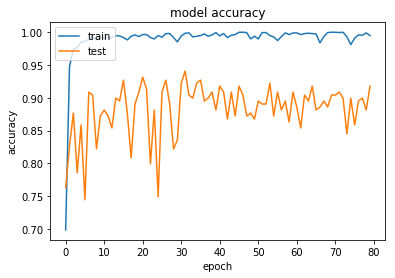

In [0]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

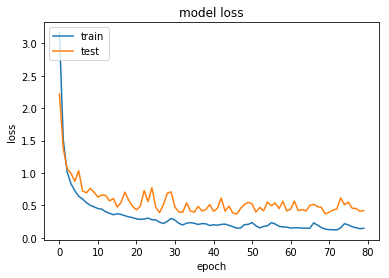

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
X_test.shape

(939, 120, 120, 1)

In [0]:
y_pred1 = model.predict_classes(X_test)

In [0]:
metrics.accuracy_score(y_test,y_pred1)

0.9435569755058573

In [0]:
metrics.confusion_matrix(y_test,y_pred1,labels=[0,1,2,3,4])

array([[134,   0,   2,   4,   7],
       [  0, 110,   0,   0,   1],
       [  9,   0, 215,   4,   9],
       [  4,   0,   2, 238,   2],
       [  2,   0,   4,   3, 189]], dtype=int64)

In [0]:
metrics.precision_recall_fscore_support(y_test,y_pred1,labels=[0,1,2,3,4])

(array([0.89932886, 1.        , 0.96412556, 0.95582329, 0.90865385]),
 array([0.91156463, 0.99099099, 0.907173  , 0.96747967, 0.95454545]),
 array([0.90540541, 0.99547511, 0.93478261, 0.96161616, 0.93103448]),
 array([147, 111, 237, 246, 198], dtype=int64))